In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
df_fygt1= pd.read_csv("https://raw.githubusercontent.com/artamonoff/econometrica/refs/heads/main/econometrica-1/datasets/Macrodat.csv")
df_fygt1

,Unnamed: 0,lhur,punew,fyff,fygm3,fygt1,exruk,gdpjp
0,1,5.833333,28.993333,2.80,2.80,3.61,281.271,14.3195
1,2,5.100000,29.043333,3.39,3.21,4.07,281.254,14.8032
2,3,5.266667,29.193333,3.76,4.04,5.00,280.370,15.5764
3,4,5.600000,29.370000,3.99,4.49,5.14,279.845,15.4222
4,5,5.133333,29.396667,3.84,3.31,4.02,280.586,16.5126
...,...,...,...,...,...,...,...,...
163,164,4.100000,168.533333,5.30,5.20,5.84,161.320,NaN
164,165,4.033333,170.266667,5.85,5.69,6.22,157.990,NaN
165,166,4.033333,171.533333,6.53,5.69,6.17,150.920,NaN
166,167,4.000000,173.033333,6.52,6.00,6.13,143.360,NaN


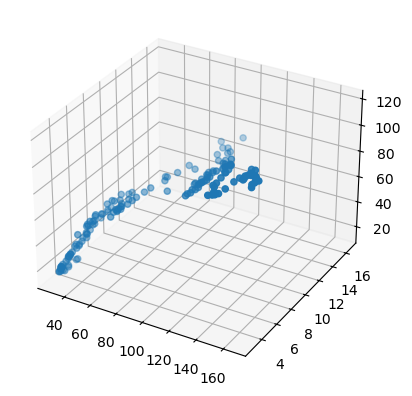

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')

ax.scatter (xs = 'punew', ys = 'fygt1',zs = 'gdpjp', data = df_fygt1)
plt.show()

In [4]:
#Подгоним плоскость 

fitted_plane = smf.ols(formula= 'fygt1 ~ punew + np.log(gdpjp)', data=df_fygt1).fit()


In [5]:
fitted_plane.params

Intercept       -11.220194
punew            -0.052998
np.log(gdpjp)     5.476567
dtype: float64

In [6]:
fitted_plane = smf.ols(formula= 'fygt1 ~ punew + np.sin(gdpjp)', data=df_fygt1).fit()

In [7]:
fitted_plane.params

Intercept        5.734943
punew            0.011155
np.sin(gdpjp)   -0.694147
dtype: float64

In [8]:
beta0, beta1, beta2 = fitted_plane.params

In [9]:
X= np.arange(start = df_fygt1 ['punew'].min(), stop = df_fygt1['punew'].max(), step=1)
Y= np.arange(start = df_fygt1 ['gdpjp'].min(), stop = df_fygt1 ['gdpjp'].max(), step=1)
X,Y = np.meshgrid(X,Y)

In [10]:
Z = beta0 + beta1 * X+ beta2 * Y

<function matplotlib.pyplot.show(close=None, block=None)>

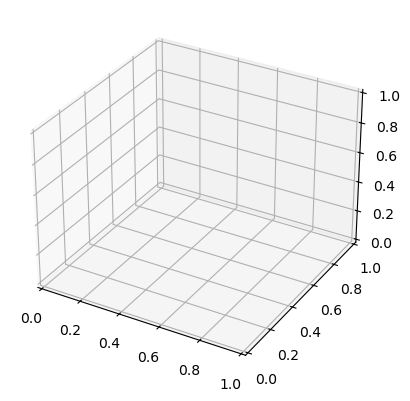

In [11]:
fig.ax = plt.subplots(subplot_kw = {'projection': '3d'})
ax.plot_surface(X,Y,Z, color = 'r', alpha = 0.2)
ax.scatter (zs = 'gdpjp', xs = 'punew', ys = 'fygt1', data = df_fygt1)
plt.show